In [1]:
import pandas as pd
path='datasets/car_data.csv'
df=pd.read_csv(path)

In [2]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.AnnualSalary.idxmax()

907

In [5]:
df.AnnualSalary.idxmin()

39

In [6]:
df.iloc[906]

User ID            505
Gender          Female
Age                 33
AnnualSalary     60000
Purchased            0
Name: 906, dtype: object

In [7]:
df.iloc[38]

User ID           121
Gender           Male
Age                42
AnnualSalary    73000
Purchased           1
Name: 38, dtype: object

In [8]:
df.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [9]:
df_dropped=df.drop('User ID', axis=1)

In [10]:
df_dropped

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [11]:
# from IPython.display import display
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)



In [12]:
display(df_dropped)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [13]:
df.Gender.describe()

count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb=LabelEncoder()
df_dropped['Gender']=lb.fit_transform(df_dropped['Gender'])

In [16]:
df_dropped

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [17]:
df_dropped.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


In [18]:
# we need to scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [19]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

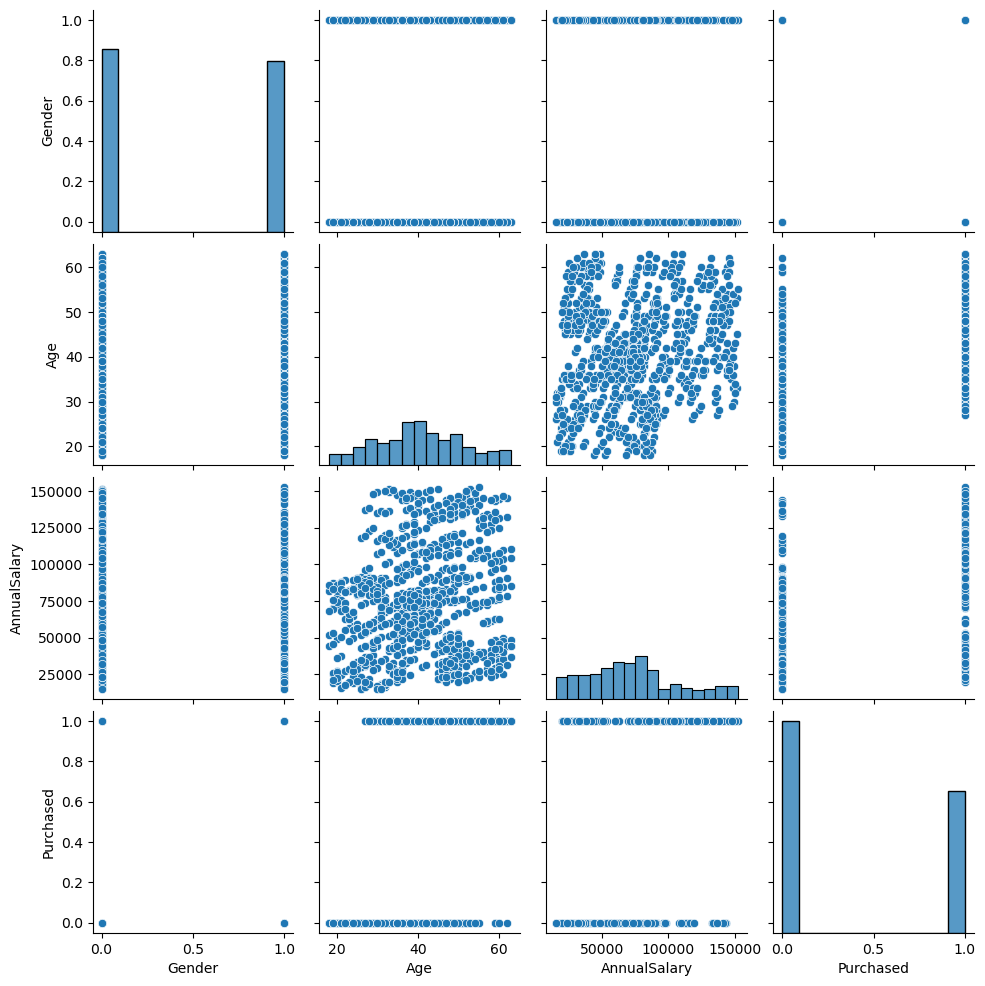

In [20]:
sns.pairplot(df_dropped)


<AxesSubplot: >

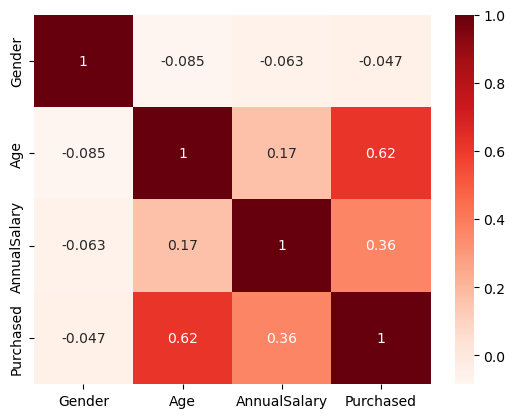

In [21]:
sns.heatmap(df_dropped.corr(),cmap=plt.cm.Reds,annot=True)

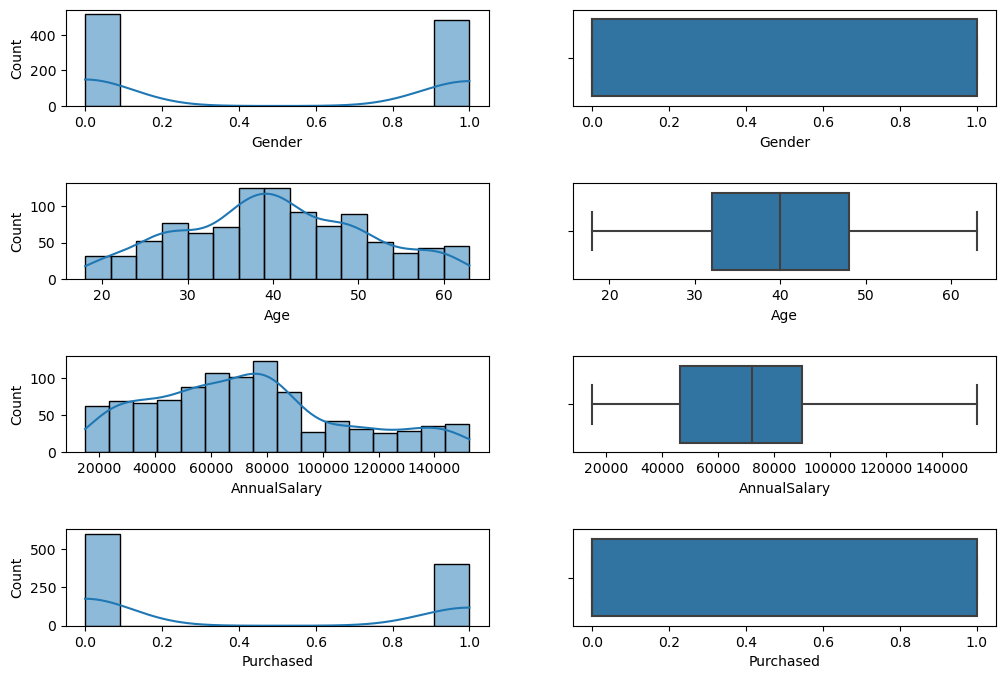

In [22]:
fig, ax=plt.subplots(4,2 , figsize=(12,8))
items=df_dropped.columns
for i, item in enumerate(items):
    sns.histplot(x=df_dropped[item], ax=ax[i,0], kde=True)
    sns.boxplot(x=df_dropped[item], ax=ax[i,1])
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
DT=DecisionTreeRegressor()
RT=RandomForestClassifier()
y=df_dropped.Purchased
X=df_dropped.drop('Purchased', axis=1)
models=[DT, RT]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, train_size=0.7)

In [31]:
for model in models:
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    score=accuracy_score(preds, y_test)
    print(f"the accuracy score from model {model} is " , score)
    

the accuracy score from model DecisionTreeRegressor() is  0.8866666666666667
the accuracy score from model RandomForestClassifier() is  0.8833333333333333


In [32]:
# logistic regression
from sklearn.linear_model import LogisticRegression
def logistic(X_train,y_train,X_test, y_test):
    log_re=LogisticRegression()
    log_re.fit(X_train,y_train)
    preds=log_re.predict(X_test)
    ac=accuracy_score(preds, y_test)
    print("the accuracy score is", ac)
logistic(X_train,y_train, X_test,y_test )

the accuracy score is 0.7066666666666667


In [33]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
scaled_x_train=sc.fit_transform(X_train).copy()
scaled_x_test=sc.fit_transform(X_test).copy()
logistic(scaled_x_train,y_train,scaled_x_test,y_test )


the accuracy score is 0.8133333333333334


In [34]:
for model in models:
    model.fit(scaled_x_train,y_train)
    preds=model.predict(scaled_x_test)
    score=accuracy_score(preds, y_test)
    print(f"the accuracy score from model {model} is " , score)
    

the accuracy score from model DecisionTreeRegressor() is  0.86
the accuracy score from model RandomForestClassifier() is  0.8866666666666667


In [35]:
import numpy as np
np.unique(X_test)


array([     0,      1,     18,     19,     20,     21,     22,     23,
           24,     25,     26,     27,     28,     29,     30,     31,
           32,     33,     34,     35,     36,     37,     38,     39,
           40,     41,     42,     43,     44,     45,     46,     47,
           48,     49,     50,     51,     52,     53,     54,     55,
           56,     57,     58,     59,     60,     61,     62,     63,
        15000,  17000,  19500,  20000,  21500,  22000,  22500,  24500,
        25000,  26000,  26500,  27000,  27500,  28000,  28500,  29500,
        31000,  31500,  32000,  32500,  33000,  33500,  34000,  34500,
        35000,  35500,  36000,  36500,  38000,  39000,  40500,  41500,
        42500,  43000,  43500,  44000,  44500,  45000,  45500,  46500,
        47000,  48500,  49500,  50000,  50500,  51500,  52000,  52500,
        54000,  54500,  55000,  55500,  56500,  57000,  58000,  58500,
        59000,  59500,  60000,  60500,  61000,  61500,  62000,  62500,
      

In [36]:

from scipy.stats import mode
mode(X, axis=0, keepdims=True)
    

ModeResult(mode=array([[    0,    38, 81500]], dtype=int64), count=array([[516,  48,  18]]))

In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for k in range (1,30):
    KN=KNeighborsClassifier(n_neighbors=k)
    KN.fit(scaled_x_train, y_train)
    kn_preds=KN.predict(scaled_x_test)
    accuracy=accuracy_score(kn_preds,y_test)
    acc.append(accuracy)


In [38]:
acc

[0.9066666666666666,
 0.88,
 0.8933333333333333,
 0.8833333333333333,
 0.91,
 0.9066666666666666,
 0.9133333333333333,
 0.8933333333333333,
 0.9066666666666666,
 0.8966666666666666,
 0.91,
 0.9,
 0.9033333333333333,
 0.9033333333333333,
 0.9,
 0.9,
 0.8966666666666666,
 0.8966666666666666,
 0.8966666666666666,
 0.8933333333333333,
 0.8966666666666666,
 0.9,
 0.9033333333333333,
 0.9,
 0.9,
 0.9,
 0.8966666666666666,
 0.8966666666666666,
 0.9]

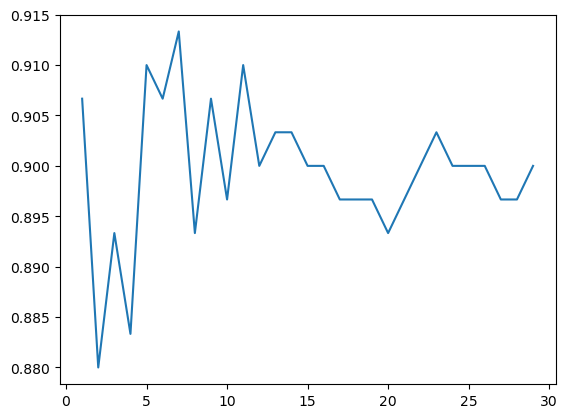

In [39]:
plt.plot(range(1,30),acc)


In [40]:
new_xtrain=sc.fit_transform(X_train)
new_xtest=sc.transform(X_test)

In [41]:
KN=KNeighborsClassifier(n_neighbors=7)
KN.fit(scaled_x_train, y_train)
kn_preds=KN.predict(scaled_x_test)
accuracy=accuracy_score(kn_preds,y_test)
accuracy

0.9133333333333333

In [42]:
# it shows that the KNneighbours yields  the better results
# searching best paremeters using cv methods
from sklearn.model_selection import RandomizedSearchCV
knn=KNeighborsClassifier()
param_grid={'n_neighbors':range(1,32),
           'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
Random_cv=RandomizedSearchCV(knn,param_distributions=param_grid, n_iter=10, cv=5, random_state=0)
Random_cv.fit(scaled_x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 32),
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [43]:
Random_cv.best_params_

{'weights': 'uniform', 'n_neighbors': 28, 'metric': 'euclidean'}

In [44]:
Random_cv.best_score_

0.9057142857142857

In [45]:
kn=KNeighborsClassifier(weights= 'uniform', n_neighbors= 26, metric= 'euclidean')

In [46]:
kn.fit(scaled_x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [47]:
preds=kn.predict(scaled_x_test)
acc=accuracy_score(preds,y_test)

In [48]:
acc

0.9

In [49]:
#overall this yields the better results

### using SVM 

In [50]:
from sklearn.svm import SVC
model=SVC()
model.fit(scaled_x_train,y_train)
preds=model.predict(scaled_x_test)

In [51]:
acc=accuracy_score(preds,y_test)

In [52]:
acc

0.9033333333333333

In [53]:
from scipy.stats import uniform
search_param={"C": uniform(0,10),
             'kernel':['rbf'],
              'degree':uniform(1,5),
               'gamma':uniform(0,10)
             }

In [54]:
svm_cv=RandomizedSearchCV(model, param_distributions=search_param, n_iter=5, cv=10,random_state=0 )

In [55]:
svm_cv.fit(scaled_x_train,y_train)
pred_svm=svm_cv.predict(scaled_x_test)
acc=accuracy_score(pred_svm,y_test)
print("accuracy is :", acc)

accuracy is : 0.9


In [ ]:
# at conclusion that svm and kn neighbors yields the most accurate results